# A genetic algorithm for optimizing traveling salesman problem (harder case)

https://github.com/luthfishahab/geneticalgorithm

https://www.theprojectspot.com/tutorial-post/applying-a-genetic-algorithm-to-the-travelling-salesman-problem/5

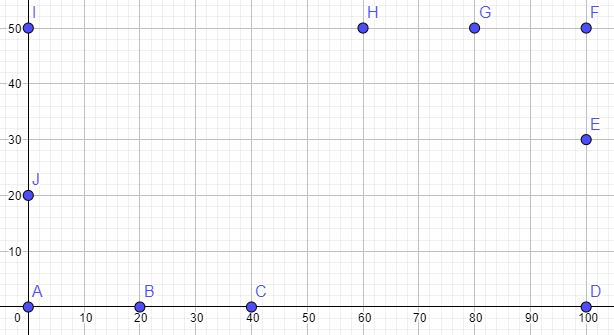

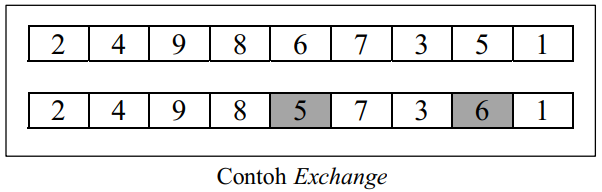

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0, 40, 40, 60, 50, 30, 90, 10, 20, 60, 80])
y = np.array([0,  0,  0,   0,  30,  50, 50, 50, 50, 20, 20, 30, 20, 25, 10, 15, 30, 40, 40, 40])

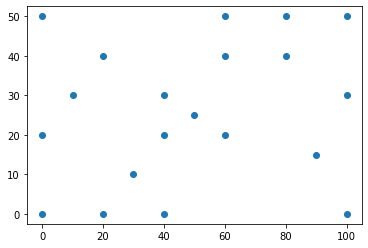

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 100

# maximum generation
N = 200

In [5]:
# distance matrix
d = np.zeros((m, m), dtype=int)

for i in range(m):
    for j in range(m):
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[  0,  20,  40, 100, 104, 111,  94,  78,  50,  20,  44,  50,  63,
         55,  31,  91,  31,  44,  72,  89],
       [ 20,   0,  20,  80,  85,  94,  78,  64,  53,  28,  28,  36,  44,
         39,  14,  71,  31,  40,  56,  72],
       [ 40,  20,   0,  60,  67,  78,  64,  53,  64,  44,  20,  30,  28,
         26,  14,  52,  42,  44,  44,  56],
       [100,  80,  60,   0,  30,  50,  53,  64, 111, 101,  63,  67,  44,
         55,  70,  18,  94,  89,  56,  44],
       [104,  85,  67,  30,   0,  20,  28,  44, 101, 100,  60,  60,  41,
         50,  72,  18,  90,  80,  41,  22],
       [111,  94,  78,  50,  20,   0,  20,  40, 100, 104,  67,  63,  50,
         55,  80,  36,  92,  80,  41,  22],
       [ 94,  78,  64,  53,  28,  20,   0,  20,  80,  85,  50,  44,  36,
         39,  64,  36,  72,  60,  22,  10],
       [ 78,  64,  53,  64,  44,  40,  20,   0,  60,  67,  36,  28,  30,
         26,  50,  46,  53,  41,  10,  22],
       [ 50,  53,  64, 111, 101, 100,  80,  60,   0,  30,  50,  

In [6]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)
    
    for i in range(n):
        pop[i] = np.random.permutation(m)
    
    pop = pd.DataFrame(pop)
    
    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    
    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b
    
    pop['fitness'] = fitness
    
    return pop

In [8]:
def randomSelection(m):
    position = np.random.permutation(m)
    
    return position[0], position[1]

In [9]:
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection(m)
        idx1 = min(a,b)
        idx2 = max(a,b)

        temp = list(pop.loc[a][idx1:idx2+1])
        temp += [val for val in pop.loc[b] if val not in temp]
        
        popc.loc[i] = temp
    
    return popc

In [10]:
def mutation(popc):
    popm = popc.copy()
    
    for i in range(n):
        a, b = randomSelection(m)
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [11]:
def combinePopulation(pop, popc, popm):
    popAll = pop.copy()
    popAll = popAll.append(popm)
    popAll = popAll.append(popm)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [12]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [13]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [14]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    plt.plot(a, b, marker = 'o')
    plt.show()

Solusi pada populasi awal
   0   1   2  3  4   5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  4  11  13  8  1  14  2  15  19  17  ...   3  10   0   5  18   9  12  16   

   19  fitness  
0   6      982  

[1 rows x 21 columns]


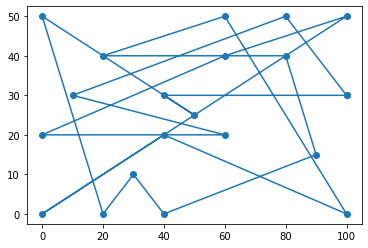


Solusi terbaik pada populasi generasi ke-1
    0  1   2  3   4  5  6   7  8  9  ...  11  12  13  14  15  16  17  18  19  \
0  17  8  18  1  10  2  0  19  3  6  ...  13  14   9  11   7   5   4  15  16   

   fitness  
0      757  

[1 rows x 21 columns]


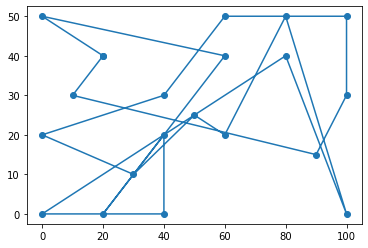


Solusi terbaik pada populasi generasi ke-2
    0  1  2   3  4  5  6  7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  17  8  0  16  9  7  6  5  14  4  ...  18  19   3  12   1  10  13   2  11   

   fitness  
0      702  

[1 rows x 21 columns]


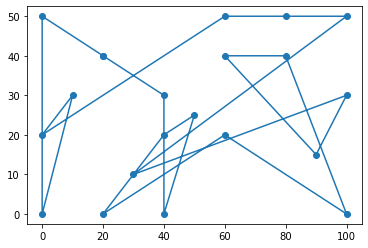


Solusi terbaik pada populasi generasi ke-3
   0   1   2  3   4   5  6   7  8   9  ...  11  12  13  14  15  16  17  18  \
0  7  18  19  2  10  12  1  11  3  15  ...   5   6  17  16   0   9  14   8   

   19  fitness  
0  13      636  

[1 rows x 21 columns]


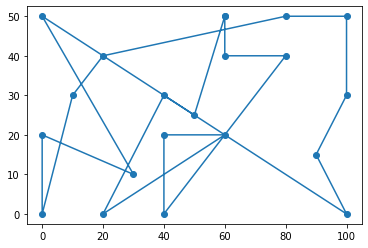


Solusi terbaik pada populasi generasi ke-4
    0  1   2   3  4   5   6   7  8   9  ...  11  12  13  14  15  16  17  18  \
0  14  1  10  13  2  11  19  12  3  15  ...   5   6  17  16  18   7   9   0   

   19  fitness  
0   8      619  

[1 rows x 21 columns]


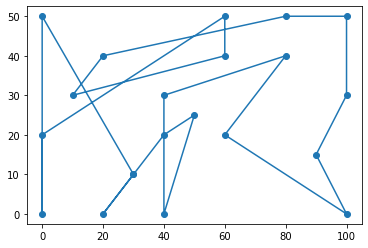


Solusi terbaik pada populasi generasi ke-5
   0  1   2  3   4  5   6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  8  0  16  9  14  1  10  13  2  11  ...  12   3  15   4   5   6  17  18   7   

   fitness  
0      594  

[1 rows x 21 columns]


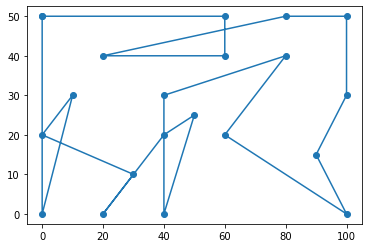


Solusi terbaik pada populasi generasi ke-6
   0   1   2  3   4   5   6  7   8  9  ...  11  12  13  14  15  16  17  18  \
0  1  10  13  2  11  19  12  3  15  4  ...   6  17   7  18  16   9   8  14   

   19  fitness  
0   0      590  

[1 rows x 21 columns]


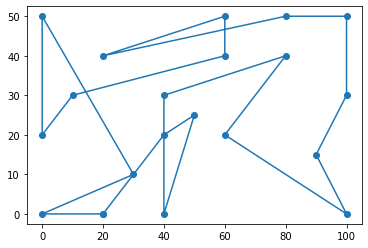


Solusi terbaik pada populasi generasi ke-7
   0   1   2  3   4   5   6  7   8  9  ...  11  12  13  14  15  16  17  18  \
0  1  10  13  2  11  17  12  3  15  4  ...   6  19   7  18  16   9   8   0   

   19  fitness  
0  14      512  

[1 rows x 21 columns]


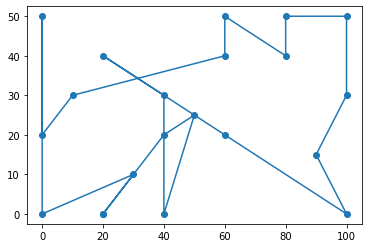


Solusi terbaik pada populasi generasi ke-8
   0   1   2  3   4   5   6  7   8  9  ...  11  12  13  14  15  16  17  18  \
0  1  10  13  2  11  17  12  3  15  4  ...   6  19   7  18  16   9   8   0   

   19  fitness  
0  14      512  

[1 rows x 21 columns]


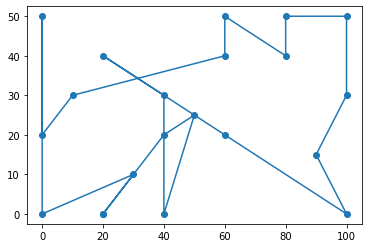


Solusi terbaik pada populasi generasi ke-9
   0   1   2  3   4   5   6  7   8  9  ...  11  12  13  14  15  16  17  18  \
0  1  10  13  2  11  17  12  3  15  4  ...   6  19   7  18  16   9   8   0   

   19  fitness  
0  14      512  

[1 rows x 21 columns]


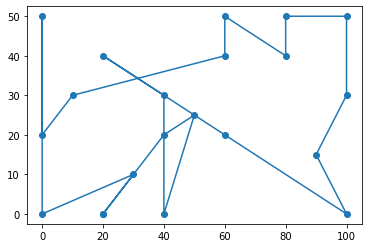


Solusi terbaik pada populasi generasi ke-10
   0   1   2  3   4   5   6  7   8  9  ...  11  12  13  14  15  16  17  18  \
0  1  10  13  2  11  17  12  3  15  4  ...   6  19   7  18  16   9   8   0   

   19  fitness  
0  14      512  

[1 rows x 21 columns]


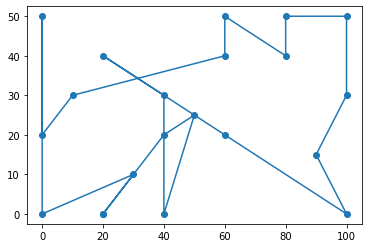


Solusi terbaik pada populasi generasi ke-11
   0   1   2  3   4   5   6  7   8  9  ...  11  12  13  14  15  16  17  18  \
0  1  10  13  2  11  17  12  3  15  4  ...   6  19  18   7   8  16   9   0   

   19  fitness  
0  14      482  

[1 rows x 21 columns]


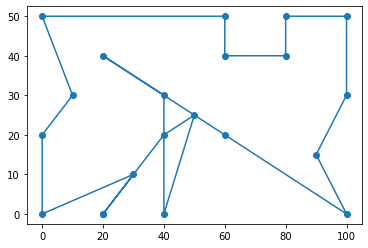


Solusi terbaik pada populasi generasi ke-12
   0  1  2   3   4   5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  1  14  10  13  2  11  17  12  ...  15   4   5   6  19  18   7   8   

   19  fitness  
0  16      457  

[1 rows x 21 columns]


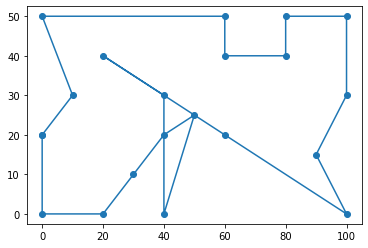


Solusi terbaik pada populasi generasi ke-13
   0  1  2   3   4   5  6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  1  14  10  13  2  11  17  12  ...  15   4   5   6  19  18   7   8   

   19  fitness  
0  16      457  

[1 rows x 21 columns]


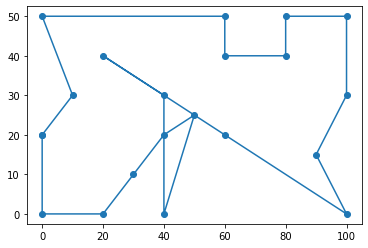


Solusi terbaik pada populasi generasi ke-14
   0  1  2   3   4   5   6   7  8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  1  14  10  13  17  11  2  12  ...  15   4   5   6  19  18   7   8   

   19  fitness  
0  16      448  

[1 rows x 21 columns]


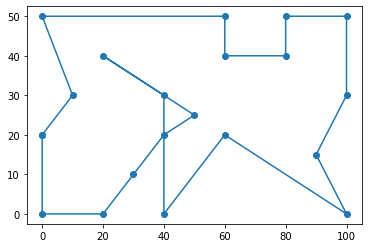


Solusi terbaik pada populasi generasi ke-15
   0  1  2   3   4   5   6   7  8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  1  14  10  13  17  11  2  12  ...  15   4   5   6  19  18   7   8   

   19  fitness  
0  16      448  

[1 rows x 21 columns]


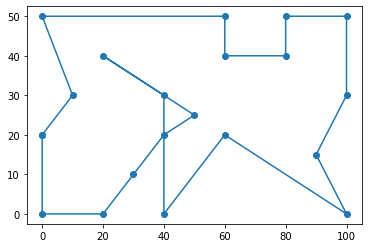


Solusi terbaik pada populasi generasi ke-16
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  17  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  16      447  

[1 rows x 21 columns]


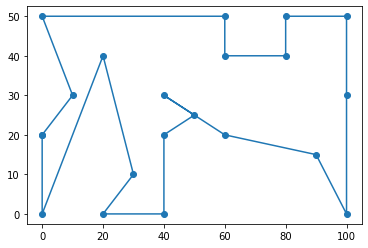


Solusi terbaik pada populasi generasi ke-17
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  17  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  16      447  

[1 rows x 21 columns]


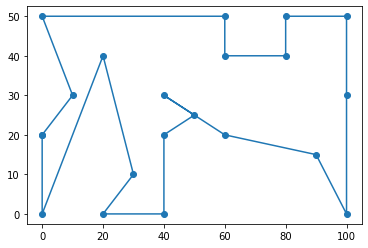


Solusi terbaik pada populasi generasi ke-18
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  17  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  16      447  

[1 rows x 21 columns]


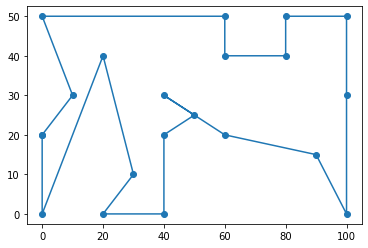


Solusi terbaik pada populasi generasi ke-19
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  17  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  16      447  

[1 rows x 21 columns]


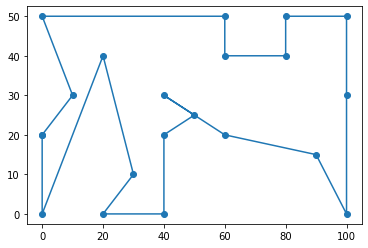


Solusi terbaik pada populasi generasi ke-20
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  16  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  17      445  

[1 rows x 21 columns]


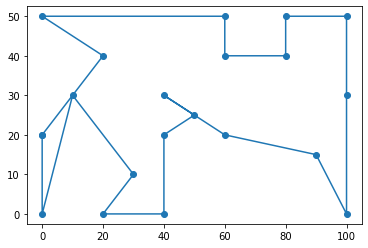


Solusi terbaik pada populasi generasi ke-21
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  16  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  17      445  

[1 rows x 21 columns]


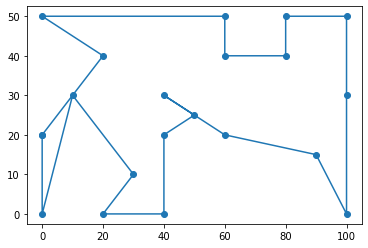


Solusi terbaik pada populasi generasi ke-22
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  16  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  17      445  

[1 rows x 21 columns]


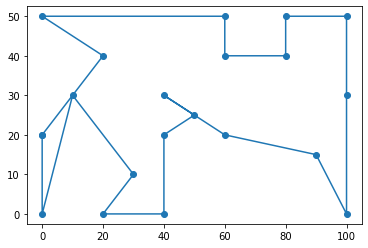


Solusi terbaik pada populasi generasi ke-23
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  16  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  17      445  

[1 rows x 21 columns]


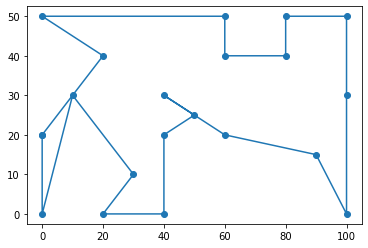


Solusi terbaik pada populasi generasi ke-24
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  16  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  17      445  

[1 rows x 21 columns]


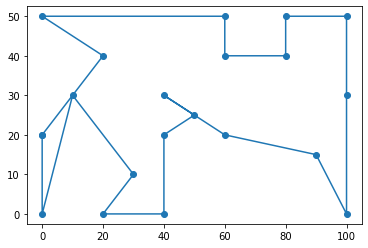


Solusi terbaik pada populasi generasi ke-25
   0  1   2   3  4  5   6   7   8   9  ...  11  12  13  14  15  16  17  18  \
0  9  0  16  14  1  2  10  13  11  12  ...   3   4   5   6  19  18   7   8   

   19  fitness  
0  17      445  

[1 rows x 21 columns]


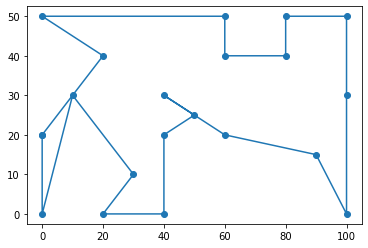


Solusi terbaik pada populasi generasi ke-26
    0   1   2   3  4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  \
0  13  11  12  15  3  4  5  6  19  18  ...   8  17  16   9   1   0  14   2   

   19  fitness  
0  10      425  

[1 rows x 21 columns]


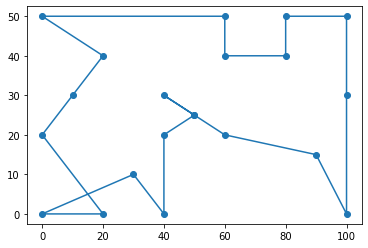


Solusi terbaik pada populasi generasi ke-27
    0   1  2   3  4   5  6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  19  18  7  17  8  16  9  0  1  14  ...  11  13   2  12   3  15   4   5   6   

   fitness  
0      402  

[1 rows x 21 columns]


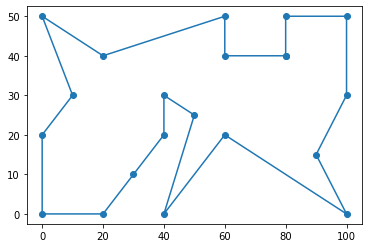


Solusi terbaik pada populasi generasi ke-28
    0   1  2   3  4   5  6  7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  19  18  7  17  8  16  9  0  1  14  ...  11  13  10  12   3  15   4   5   6   

   fitness  
0      399  

[1 rows x 21 columns]


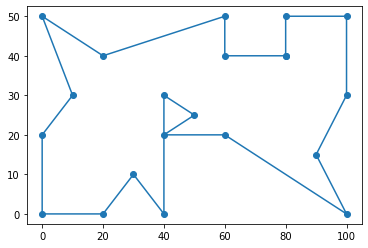


Solusi terbaik pada populasi generasi ke-29
    0  1   2  3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  7  17  8  16  9  0  1  14  10  ...  11  13  12  15   3   4   5   6  19   

   fitness  
0      397  

[1 rows x 21 columns]


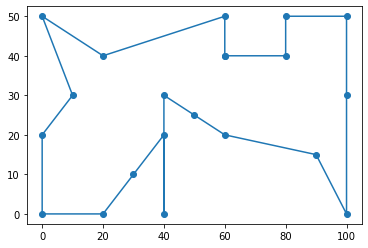


Solusi terbaik pada populasi generasi ke-30
    0  1   2  3   4  5  6  7   8   9  ...  11  12  13  14  15  16  17  18  19  \
0  18  7  17  8  16  9  0  1  14  10  ...  11  13  12  15   3   4   5   6  19   

   fitness  
0      397  

[1 rows x 21 columns]


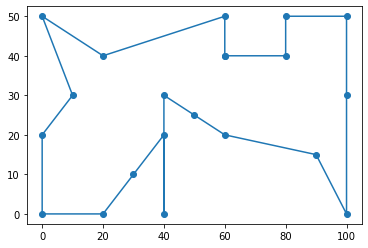


Solusi terbaik pada populasi generasi ke-31
    0  1   2  3   4  5  6  7   8  9  ...  11  12  13  14  15  16  17  18  19  \
0  18  7  17  8  16  9  0  1  14  2  ...  13  11  12   3  15   4   5   6  19   

   fitness  
0      391  

[1 rows x 21 columns]


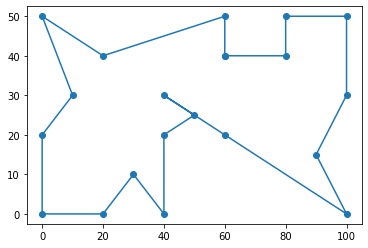


Solusi terbaik pada populasi generasi ke-32
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  11  12  15   3   4   5   6  19  18   

   fitness  
0      389  

[1 rows x 21 columns]


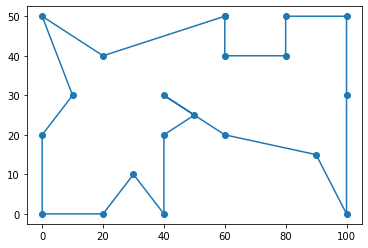


Solusi terbaik pada populasi generasi ke-33
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  11  12  15   3   4   5   6  19  18   

   fitness  
0      389  

[1 rows x 21 columns]


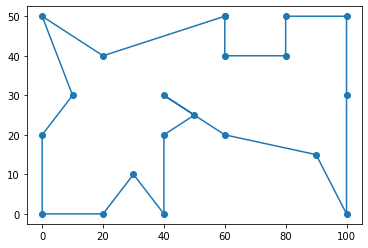


Solusi terbaik pada populasi generasi ke-34
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


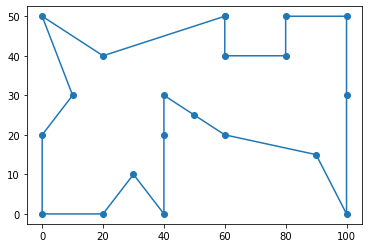


Solusi terbaik pada populasi generasi ke-35
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


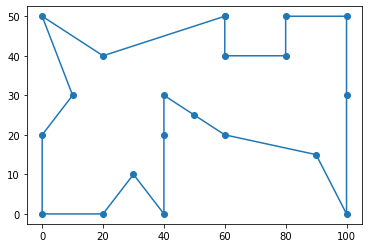


Solusi terbaik pada populasi generasi ke-36
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


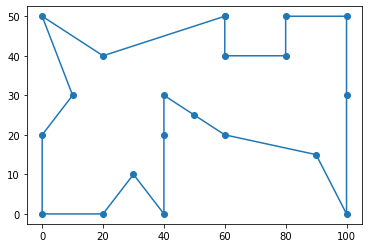


Solusi terbaik pada populasi generasi ke-37
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


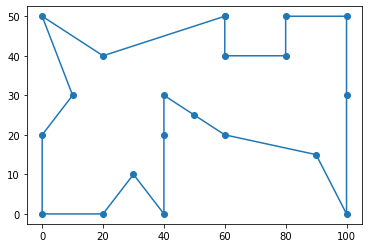


Solusi terbaik pada populasi generasi ke-38
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


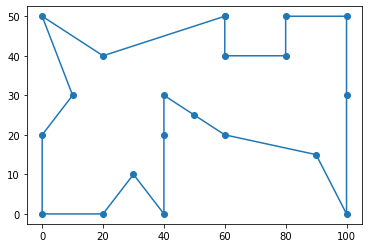


Solusi terbaik pada populasi generasi ke-39
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


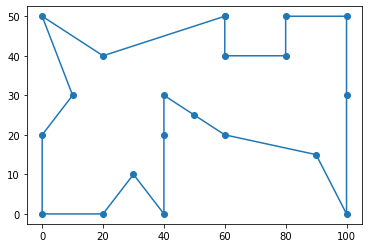


Solusi terbaik pada populasi generasi ke-40
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


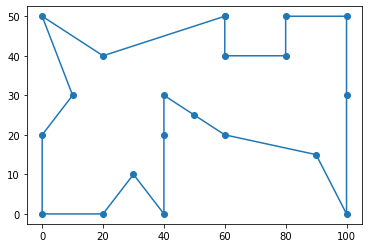


Solusi terbaik pada populasi generasi ke-41
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


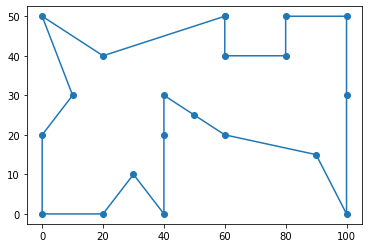


Solusi terbaik pada populasi generasi ke-42
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


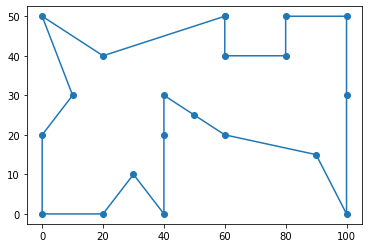


Solusi terbaik pada populasi generasi ke-43
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


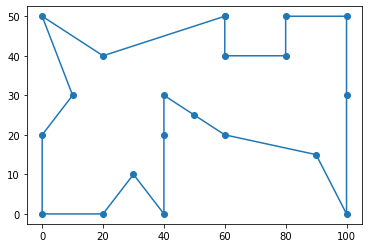


Solusi terbaik pada populasi generasi ke-44
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


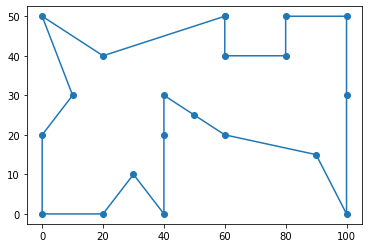


Solusi terbaik pada populasi generasi ke-45
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


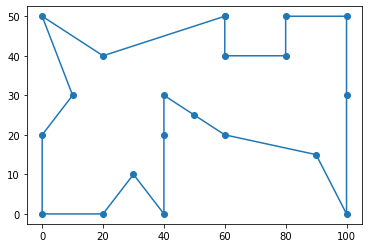


Solusi terbaik pada populasi generasi ke-46
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


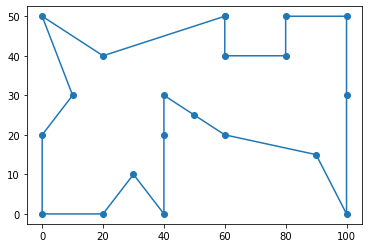


Solusi terbaik pada populasi generasi ke-47
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


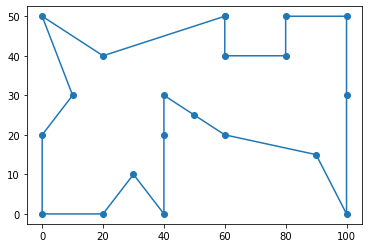


Solusi terbaik pada populasi generasi ke-48
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


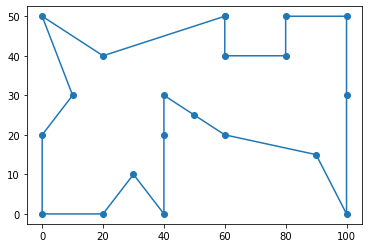


Solusi terbaik pada populasi generasi ke-49
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


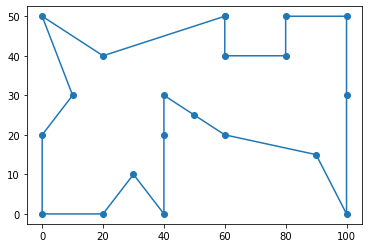


Solusi terbaik pada populasi generasi ke-50
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


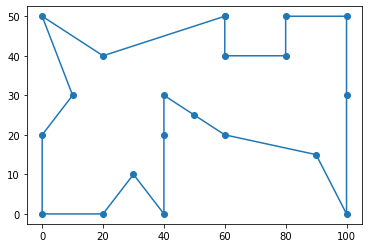


Solusi terbaik pada populasi generasi ke-51
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


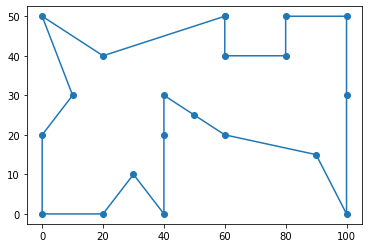


Solusi terbaik pada populasi generasi ke-52
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


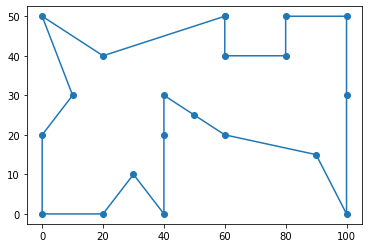


Solusi terbaik pada populasi generasi ke-53
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


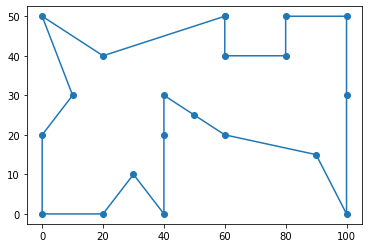


Solusi terbaik pada populasi generasi ke-54
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


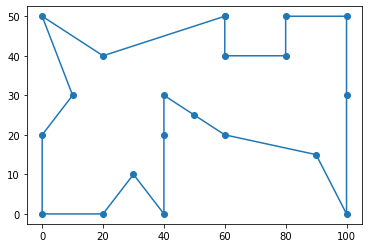


Solusi terbaik pada populasi generasi ke-55
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


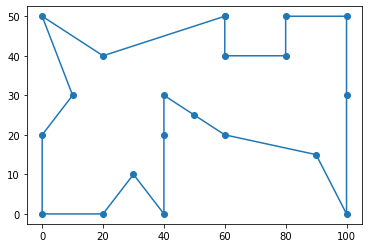


Solusi terbaik pada populasi generasi ke-56
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


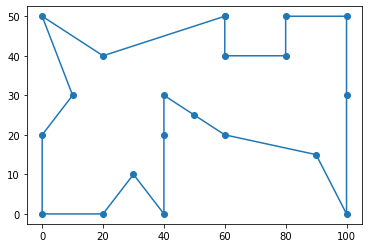


Solusi terbaik pada populasi generasi ke-57
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


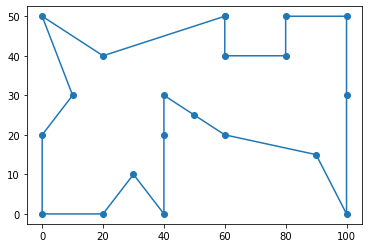


Solusi terbaik pada populasi generasi ke-58
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


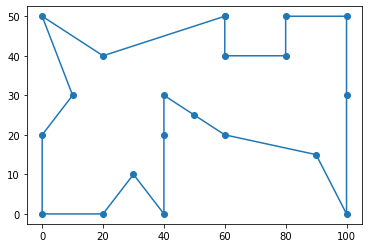


Solusi terbaik pada populasi generasi ke-59
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


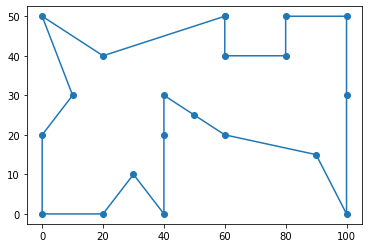


Solusi terbaik pada populasi generasi ke-60
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


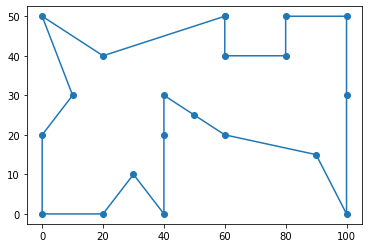


Solusi terbaik pada populasi generasi ke-61
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


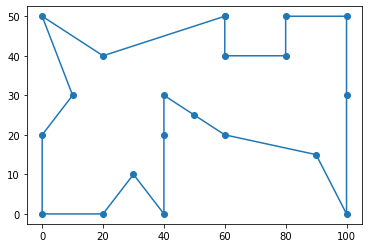


Solusi terbaik pada populasi generasi ke-62
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


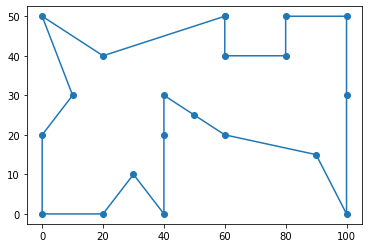


Solusi terbaik pada populasi generasi ke-63
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


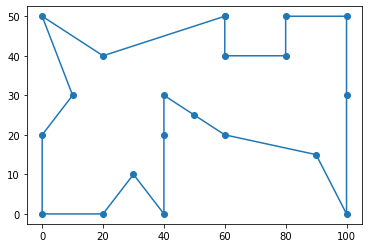


Solusi terbaik pada populasi generasi ke-64
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


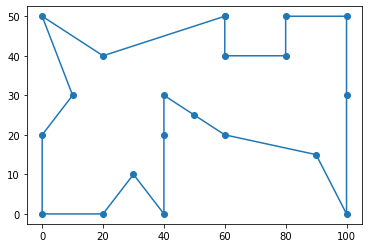


Solusi terbaik pada populasi generasi ke-65
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


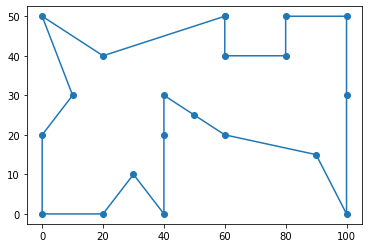


Solusi terbaik pada populasi generasi ke-66
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


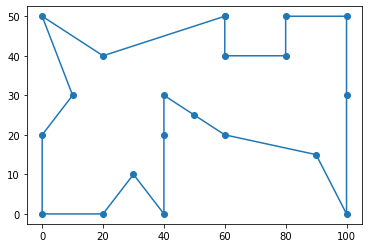


Solusi terbaik pada populasi generasi ke-67
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


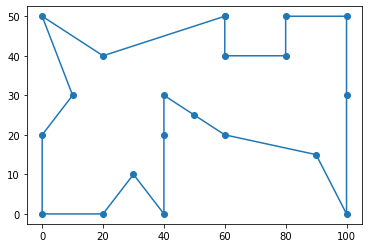


Solusi terbaik pada populasi generasi ke-68
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


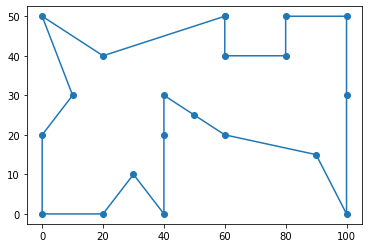


Solusi terbaik pada populasi generasi ke-69
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


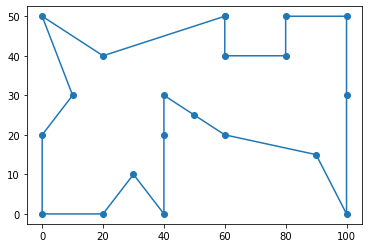


Solusi terbaik pada populasi generasi ke-70
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


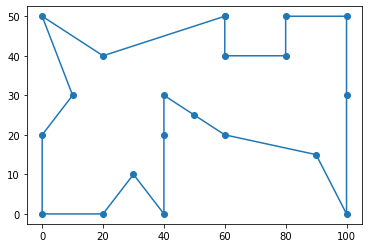


Solusi terbaik pada populasi generasi ke-71
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


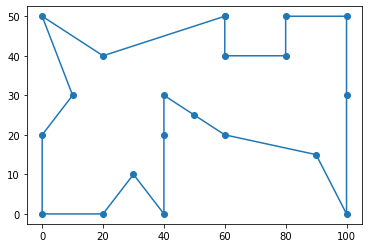


Solusi terbaik pada populasi generasi ke-72
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


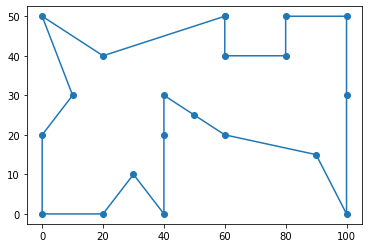


Solusi terbaik pada populasi generasi ke-73
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


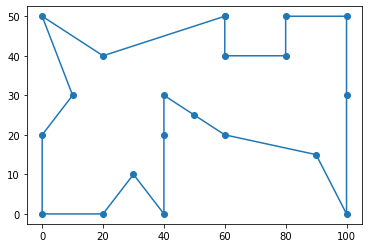


Solusi terbaik pada populasi generasi ke-74
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


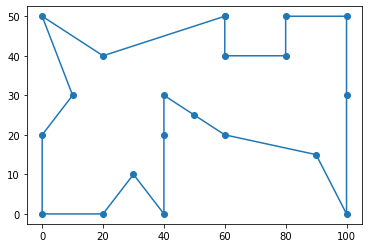


Solusi terbaik pada populasi generasi ke-75
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


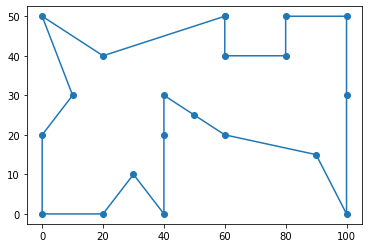


Solusi terbaik pada populasi generasi ke-76
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


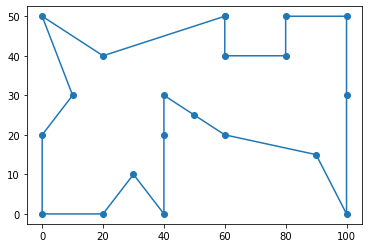


Solusi terbaik pada populasi generasi ke-77
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


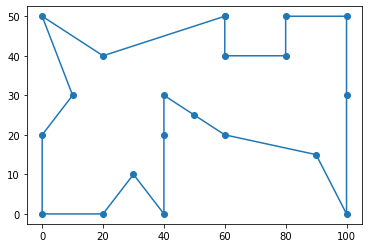


Solusi terbaik pada populasi generasi ke-78
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


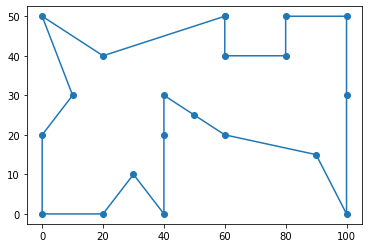


Solusi terbaik pada populasi generasi ke-79
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


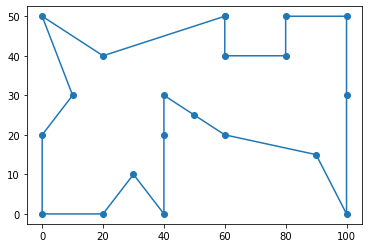


Solusi terbaik pada populasi generasi ke-80
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


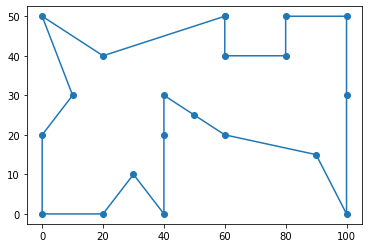


Solusi terbaik pada populasi generasi ke-81
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


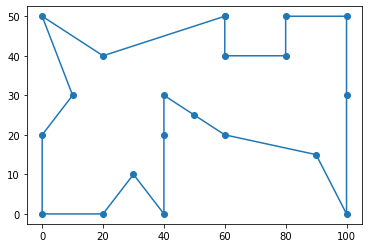


Solusi terbaik pada populasi generasi ke-82
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


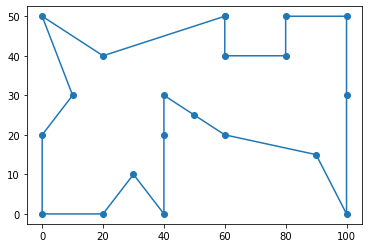


Solusi terbaik pada populasi generasi ke-83
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


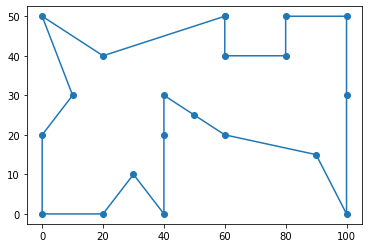


Solusi terbaik pada populasi generasi ke-84
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


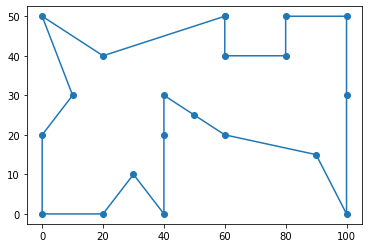


Solusi terbaik pada populasi generasi ke-85
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


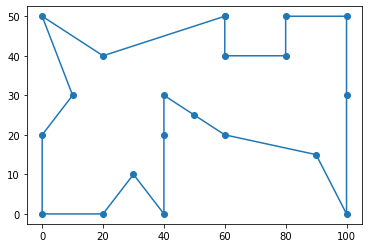


Solusi terbaik pada populasi generasi ke-86
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


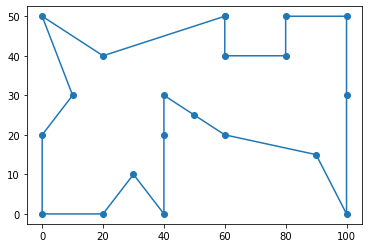


Solusi terbaik pada populasi generasi ke-87
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


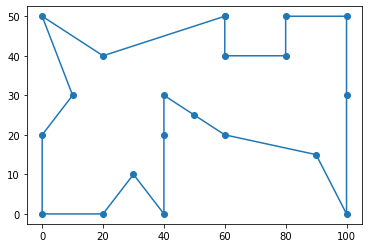


Solusi terbaik pada populasi generasi ke-88
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


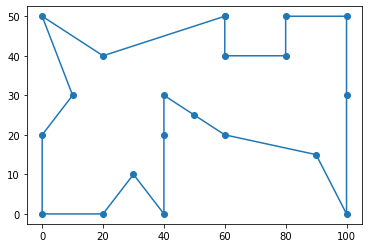


Solusi terbaik pada populasi generasi ke-89
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


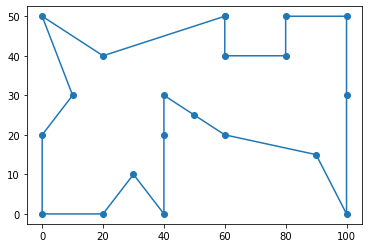


Solusi terbaik pada populasi generasi ke-90
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


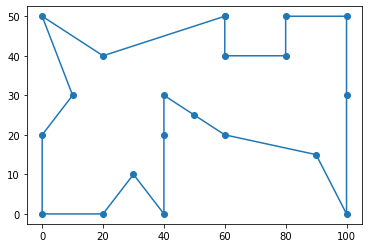


Solusi terbaik pada populasi generasi ke-91
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


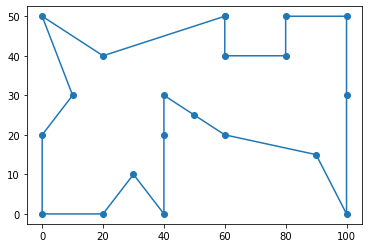


Solusi terbaik pada populasi generasi ke-92
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


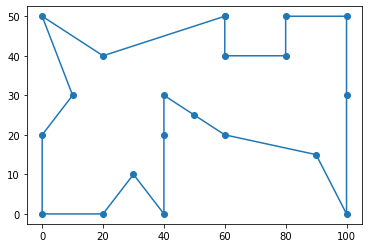


Solusi terbaik pada populasi generasi ke-93
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


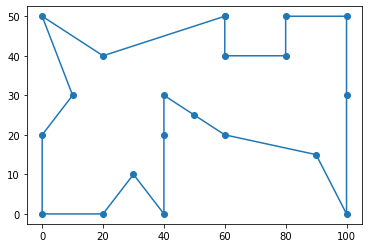


Solusi terbaik pada populasi generasi ke-94
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


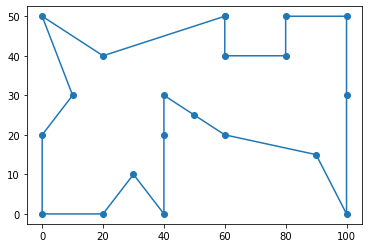


Solusi terbaik pada populasi generasi ke-95
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


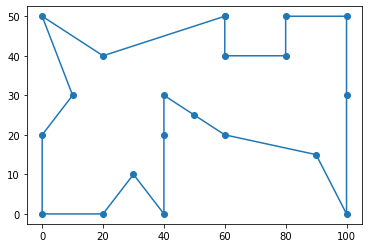


Solusi terbaik pada populasi generasi ke-96
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


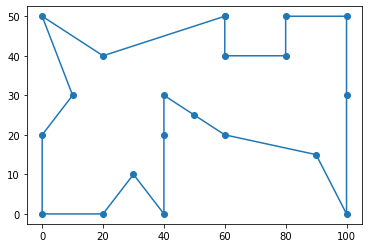


Solusi terbaik pada populasi generasi ke-97
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


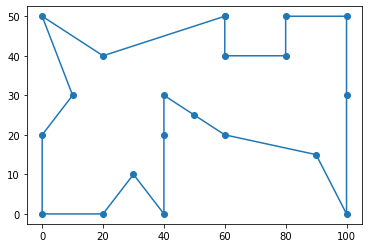


Solusi terbaik pada populasi generasi ke-98
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


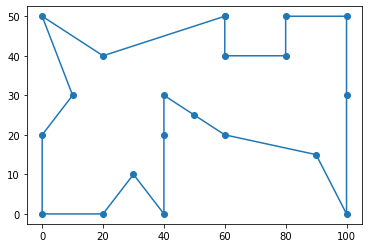


Solusi terbaik pada populasi generasi ke-99
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


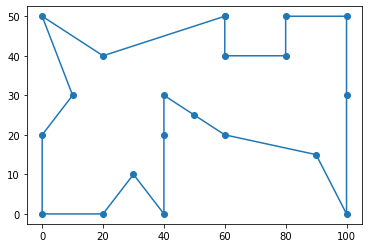


Solusi terbaik pada populasi generasi ke-100
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


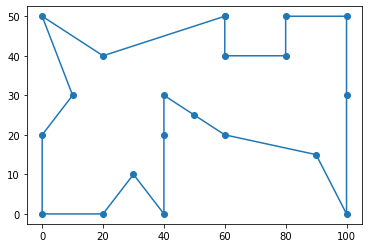


Solusi terbaik pada populasi generasi ke-101
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


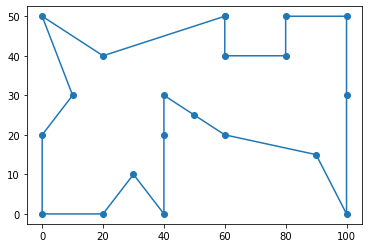


Solusi terbaik pada populasi generasi ke-102
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


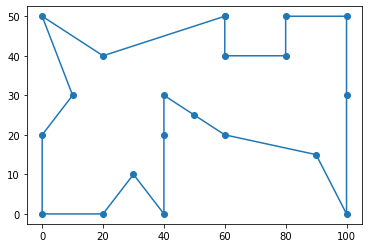


Solusi terbaik pada populasi generasi ke-103
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


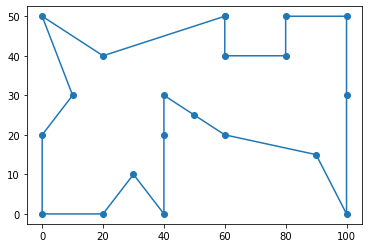


Solusi terbaik pada populasi generasi ke-104
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


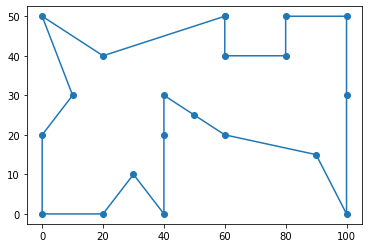


Solusi terbaik pada populasi generasi ke-105
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


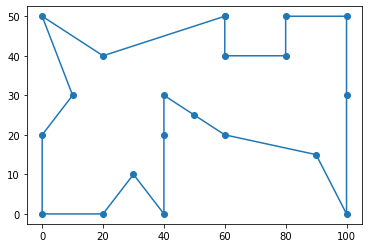


Solusi terbaik pada populasi generasi ke-106
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


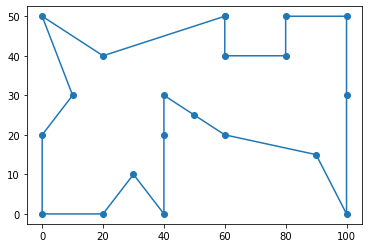


Solusi terbaik pada populasi generasi ke-107
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


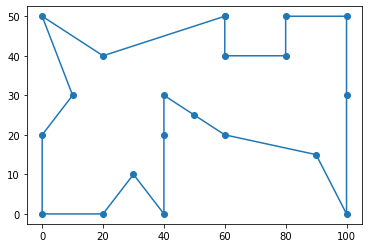


Solusi terbaik pada populasi generasi ke-108
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


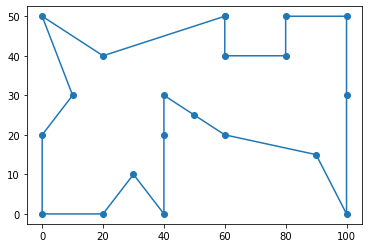


Solusi terbaik pada populasi generasi ke-109
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


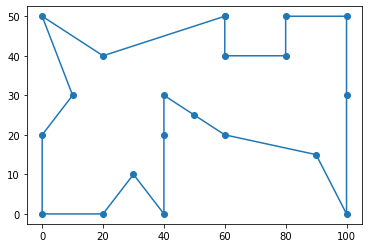


Solusi terbaik pada populasi generasi ke-110
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


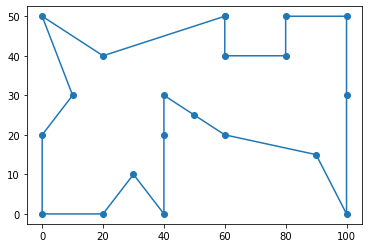


Solusi terbaik pada populasi generasi ke-111
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


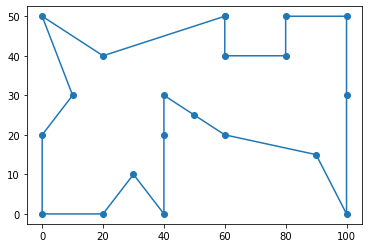


Solusi terbaik pada populasi generasi ke-112
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


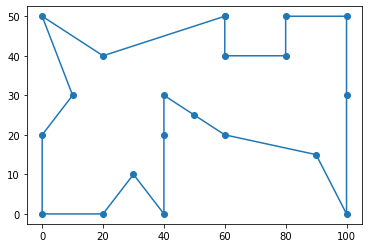


Solusi terbaik pada populasi generasi ke-113
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


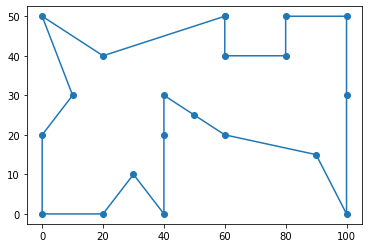


Solusi terbaik pada populasi generasi ke-114
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


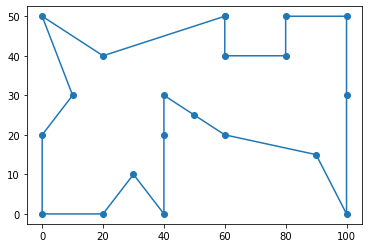


Solusi terbaik pada populasi generasi ke-115
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


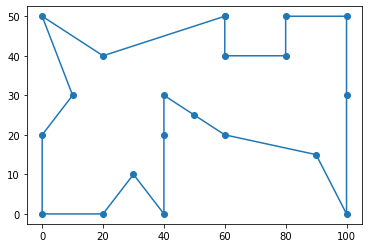


Solusi terbaik pada populasi generasi ke-116
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


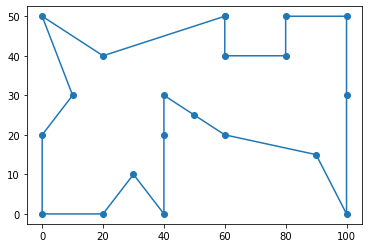


Solusi terbaik pada populasi generasi ke-117
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


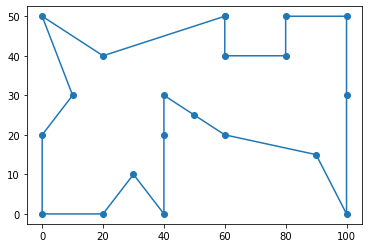


Solusi terbaik pada populasi generasi ke-118
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


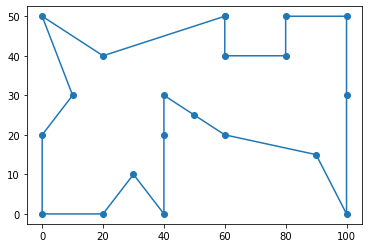


Solusi terbaik pada populasi generasi ke-119
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


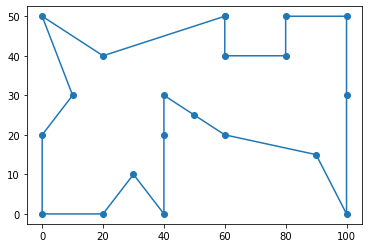


Solusi terbaik pada populasi generasi ke-120
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


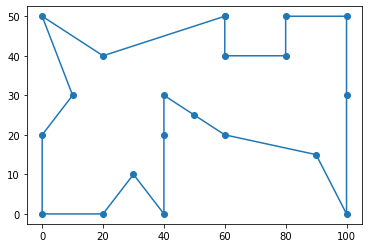


Solusi terbaik pada populasi generasi ke-121
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


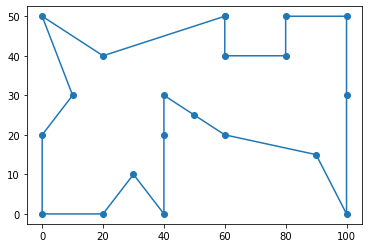


Solusi terbaik pada populasi generasi ke-122
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


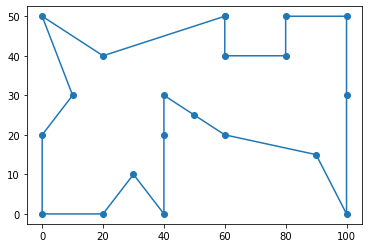


Solusi terbaik pada populasi generasi ke-123
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


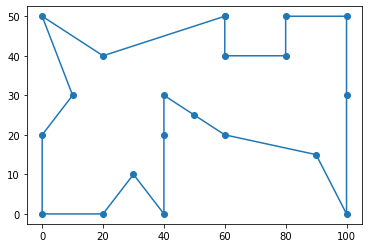


Solusi terbaik pada populasi generasi ke-124
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


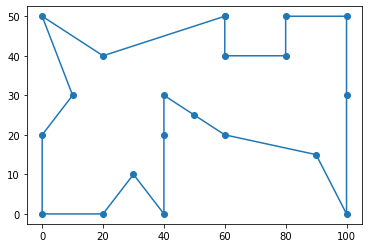


Solusi terbaik pada populasi generasi ke-125
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


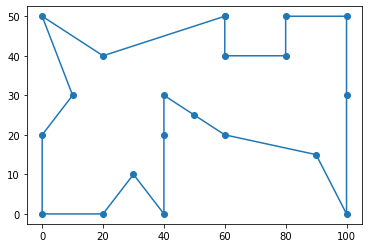


Solusi terbaik pada populasi generasi ke-126
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


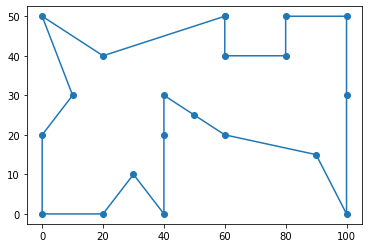


Solusi terbaik pada populasi generasi ke-127
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


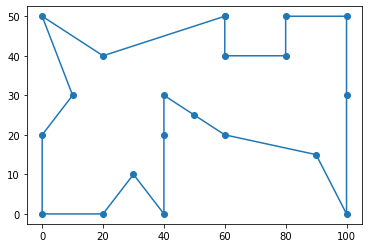


Solusi terbaik pada populasi generasi ke-128
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


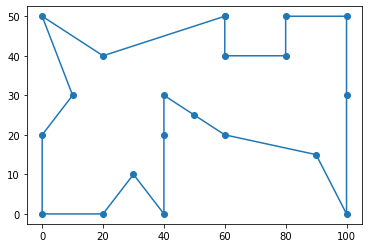


Solusi terbaik pada populasi generasi ke-129
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


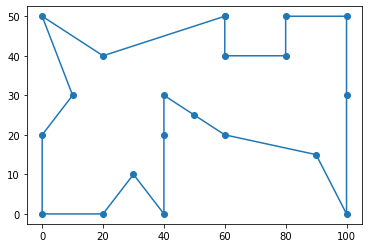


Solusi terbaik pada populasi generasi ke-130
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


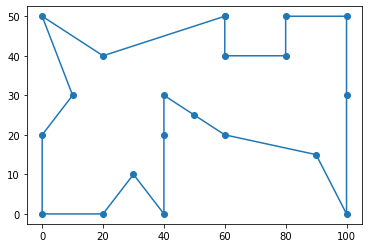


Solusi terbaik pada populasi generasi ke-131
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


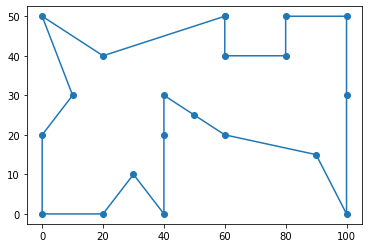


Solusi terbaik pada populasi generasi ke-132
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


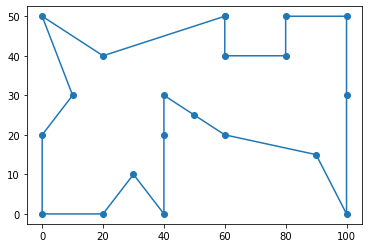


Solusi terbaik pada populasi generasi ke-133
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


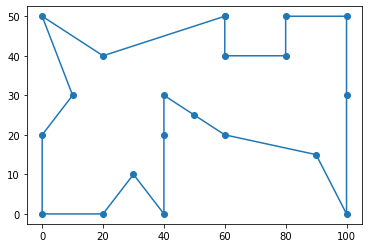


Solusi terbaik pada populasi generasi ke-134
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


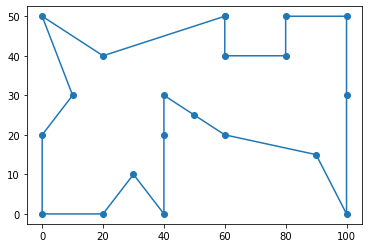


Solusi terbaik pada populasi generasi ke-135
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


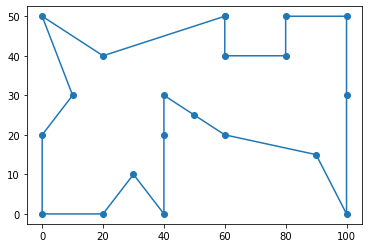


Solusi terbaik pada populasi generasi ke-136
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


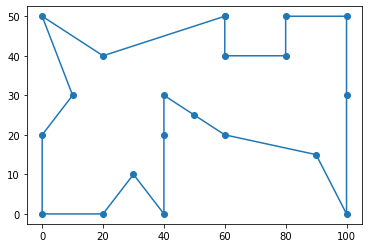


Solusi terbaik pada populasi generasi ke-137
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


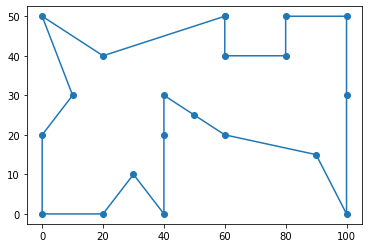


Solusi terbaik pada populasi generasi ke-138
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


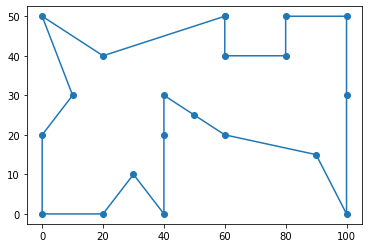


Solusi terbaik pada populasi generasi ke-139
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


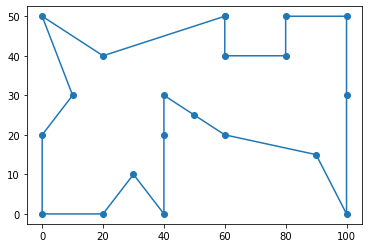


Solusi terbaik pada populasi generasi ke-140
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


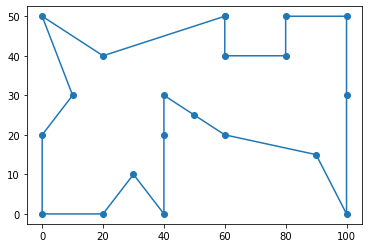


Solusi terbaik pada populasi generasi ke-141
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


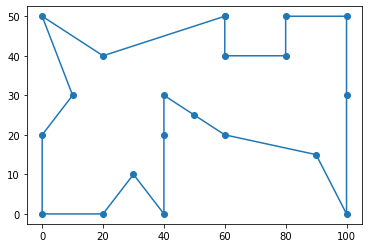


Solusi terbaik pada populasi generasi ke-142
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


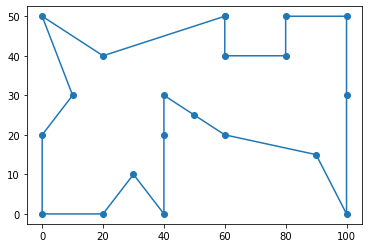


Solusi terbaik pada populasi generasi ke-143
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


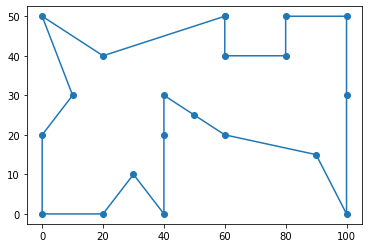


Solusi terbaik pada populasi generasi ke-144
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


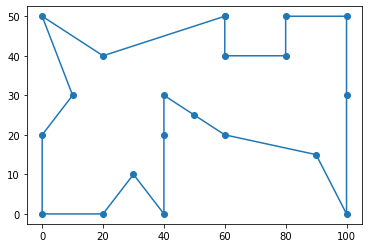


Solusi terbaik pada populasi generasi ke-145
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


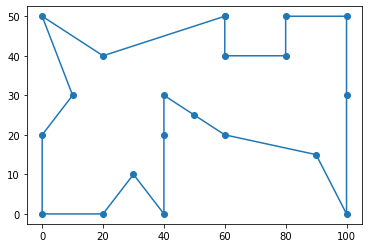


Solusi terbaik pada populasi generasi ke-146
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


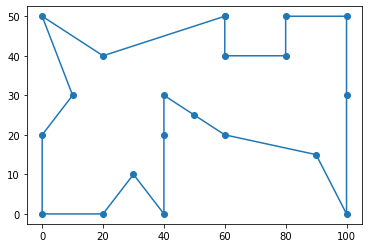


Solusi terbaik pada populasi generasi ke-147
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


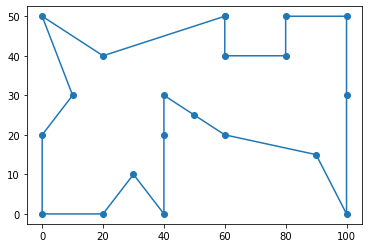


Solusi terbaik pada populasi generasi ke-148
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


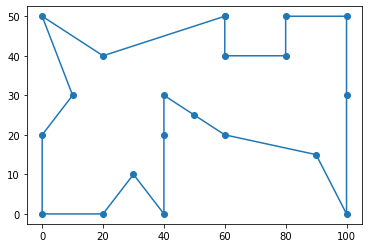


Solusi terbaik pada populasi generasi ke-149
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


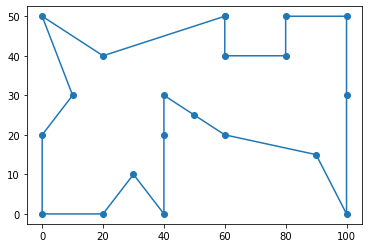


Solusi terbaik pada populasi generasi ke-150
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


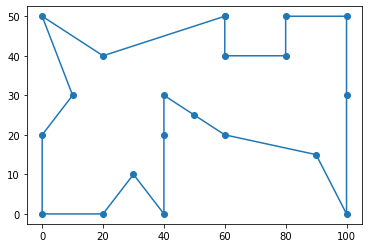


Solusi terbaik pada populasi generasi ke-151
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


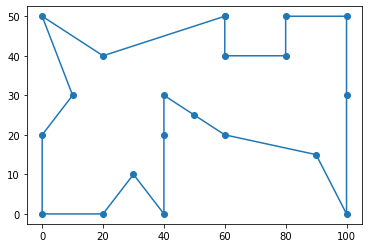


Solusi terbaik pada populasi generasi ke-152
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


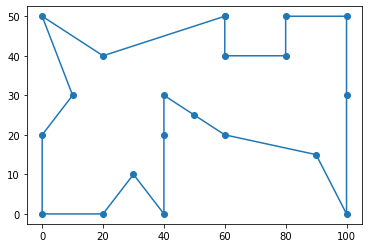


Solusi terbaik pada populasi generasi ke-153
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


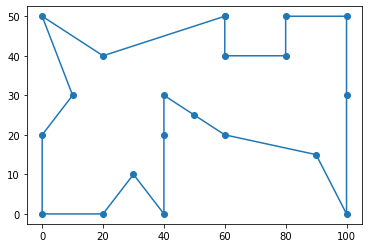


Solusi terbaik pada populasi generasi ke-154
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


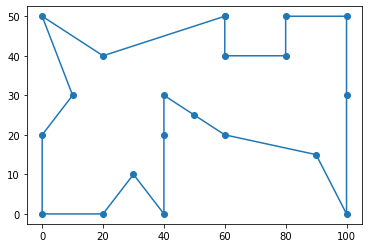


Solusi terbaik pada populasi generasi ke-155
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


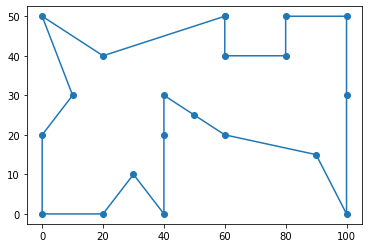


Solusi terbaik pada populasi generasi ke-156
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


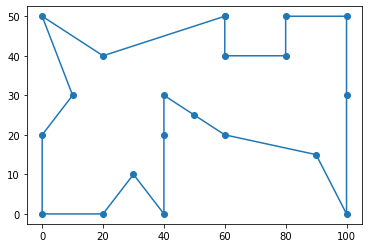


Solusi terbaik pada populasi generasi ke-157
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


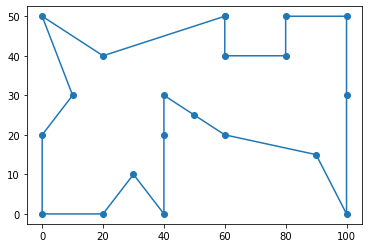


Solusi terbaik pada populasi generasi ke-158
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


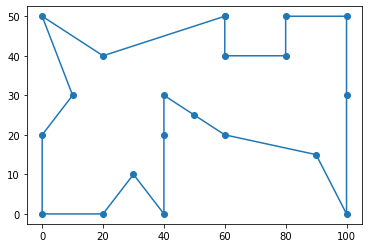


Solusi terbaik pada populasi generasi ke-159
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


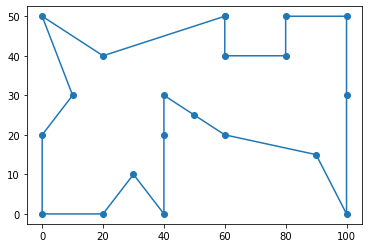


Solusi terbaik pada populasi generasi ke-160
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


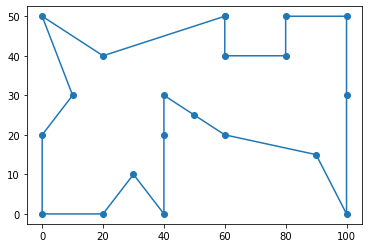


Solusi terbaik pada populasi generasi ke-161
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


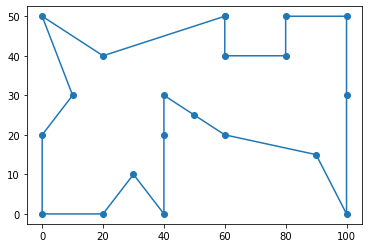


Solusi terbaik pada populasi generasi ke-162
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


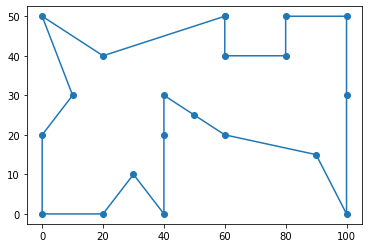


Solusi terbaik pada populasi generasi ke-163
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


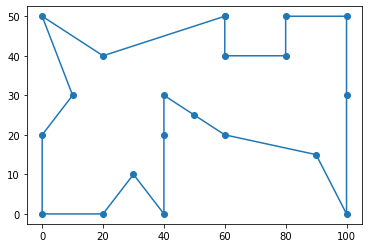


Solusi terbaik pada populasi generasi ke-164
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


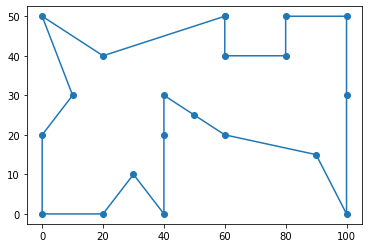


Solusi terbaik pada populasi generasi ke-165
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


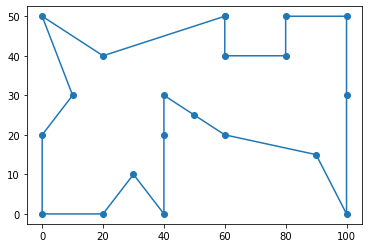


Solusi terbaik pada populasi generasi ke-166
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


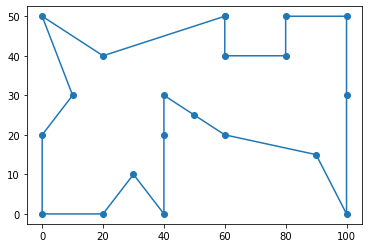


Solusi terbaik pada populasi generasi ke-167
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


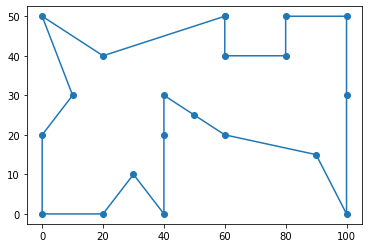


Solusi terbaik pada populasi generasi ke-168
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


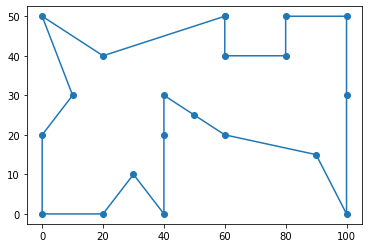


Solusi terbaik pada populasi generasi ke-169
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


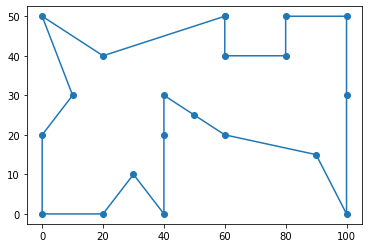


Solusi terbaik pada populasi generasi ke-170
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


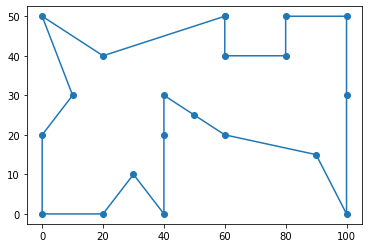


Solusi terbaik pada populasi generasi ke-171
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


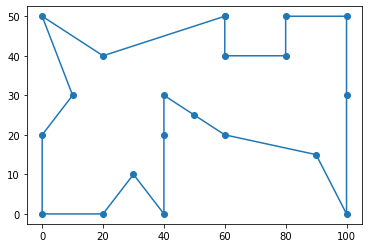


Solusi terbaik pada populasi generasi ke-172
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


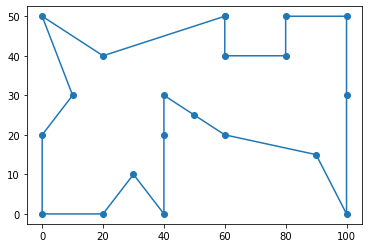


Solusi terbaik pada populasi generasi ke-173
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


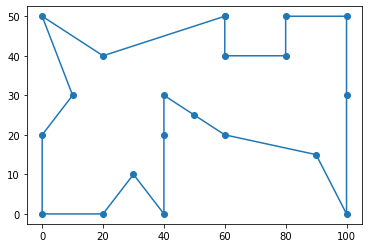


Solusi terbaik pada populasi generasi ke-174
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


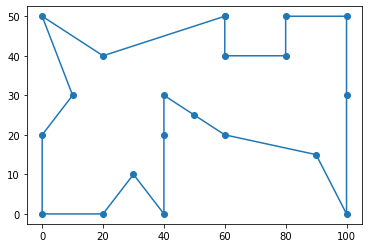


Solusi terbaik pada populasi generasi ke-175
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


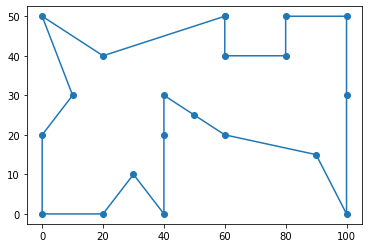


Solusi terbaik pada populasi generasi ke-176
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


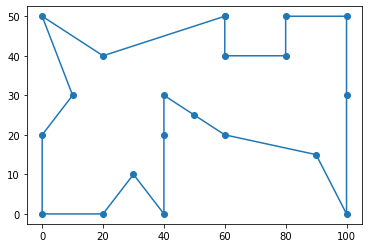


Solusi terbaik pada populasi generasi ke-177
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


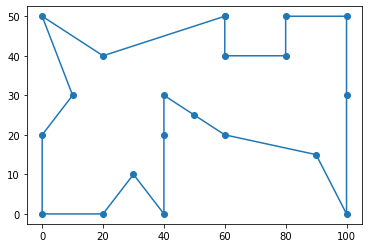


Solusi terbaik pada populasi generasi ke-178
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


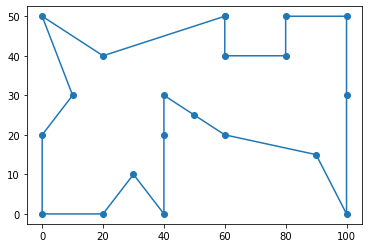


Solusi terbaik pada populasi generasi ke-179
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


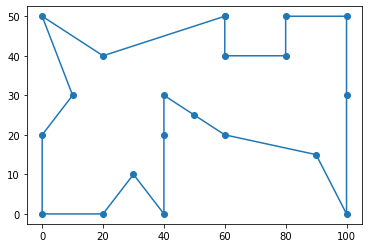


Solusi terbaik pada populasi generasi ke-180
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


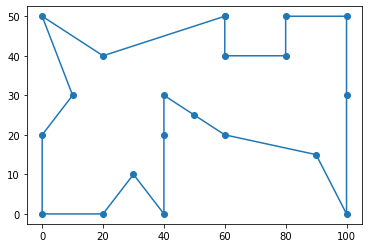


Solusi terbaik pada populasi generasi ke-181
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


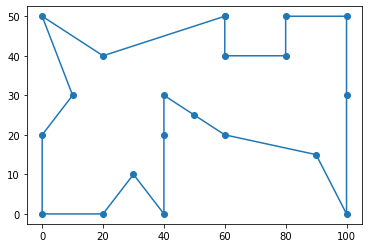


Solusi terbaik pada populasi generasi ke-182
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


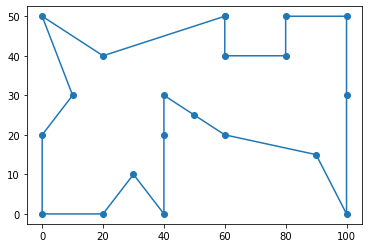


Solusi terbaik pada populasi generasi ke-183
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


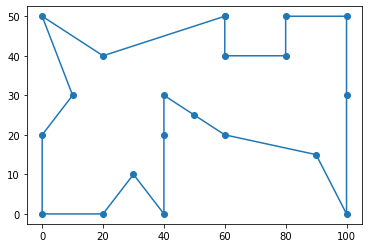


Solusi terbaik pada populasi generasi ke-184
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


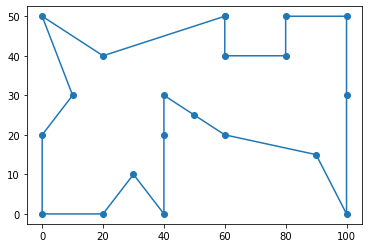


Solusi terbaik pada populasi generasi ke-185
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


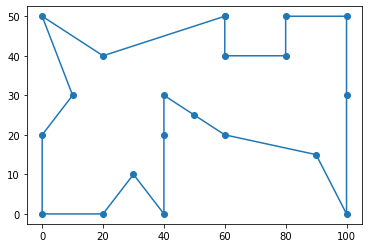


Solusi terbaik pada populasi generasi ke-186
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


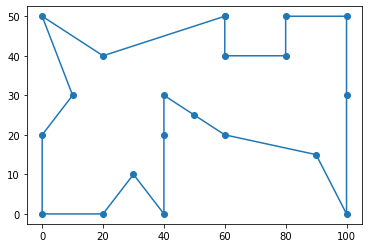


Solusi terbaik pada populasi generasi ke-187
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


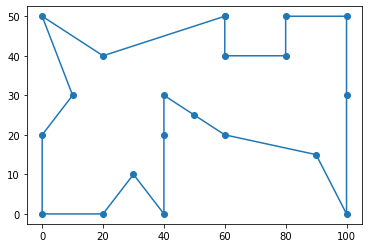


Solusi terbaik pada populasi generasi ke-188
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


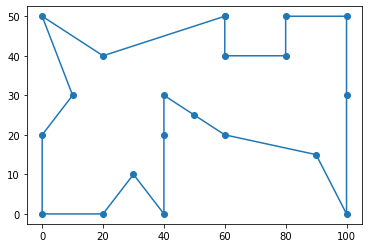


Solusi terbaik pada populasi generasi ke-189
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


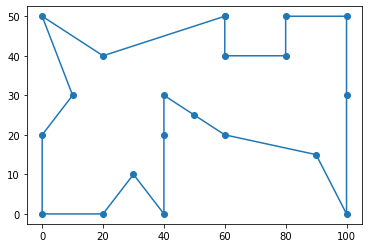


Solusi terbaik pada populasi generasi ke-190
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


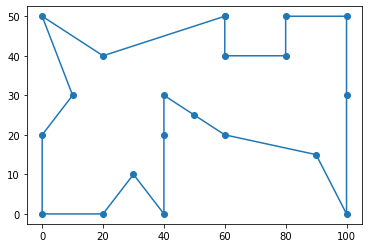


Solusi terbaik pada populasi generasi ke-191
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


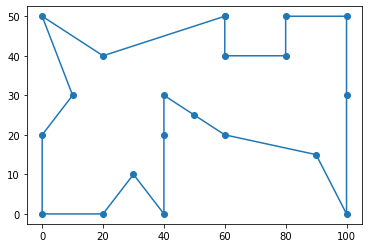


Solusi terbaik pada populasi generasi ke-192
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


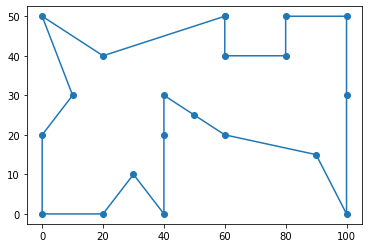


Solusi terbaik pada populasi generasi ke-193
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


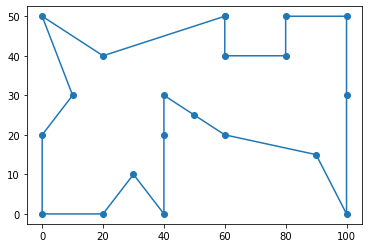


Solusi terbaik pada populasi generasi ke-194
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


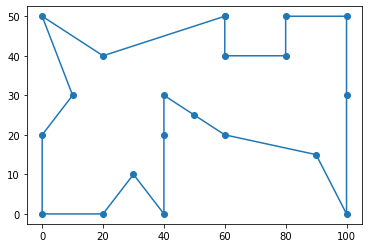


Solusi terbaik pada populasi generasi ke-195
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


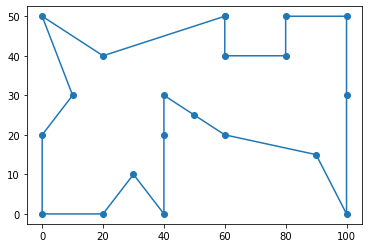


Solusi terbaik pada populasi generasi ke-196
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


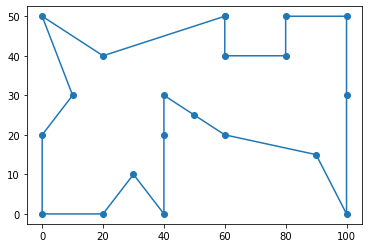


Solusi terbaik pada populasi generasi ke-197
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


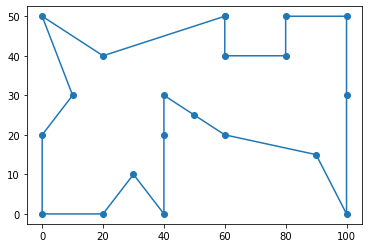


Solusi terbaik pada populasi generasi ke-198
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


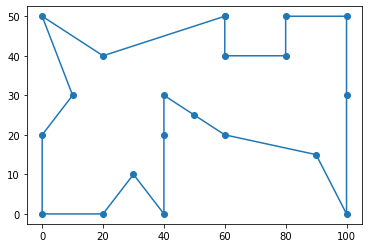


Solusi terbaik pada populasi generasi ke-199
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


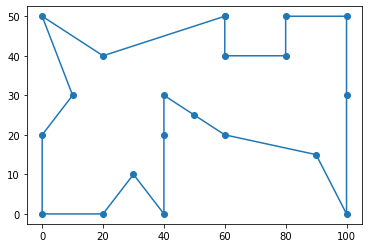


Solusi terbaik pada populasi generasi ke-200
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


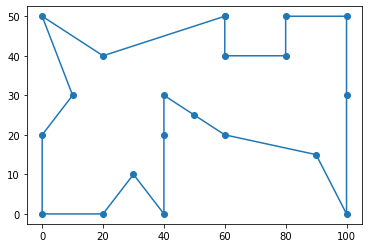


Solusi terbaik pada populasi akhir
   0   1  2   3  4  5  6   7  8   9  ...  11  12  13  14  15  16  17  18  19  \
0  7  17  8  16  9  0  1  14  2  10  ...  13  12  15   3   4   5   6  19  18   

   fitness  
0      377  

[1 rows x 21 columns]


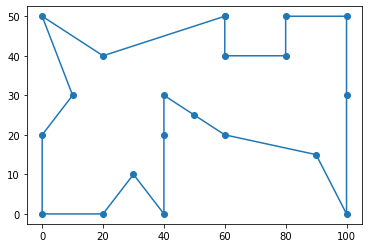

In [15]:
pop = createPopulation()
pop = fitness(pop)
print('Solusi pada populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(popc)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
    print()
    print('Solusi terbaik pada populasi generasi ke-'+ str(i))
    print(pop.head(1))
    plotSolution(pop)

print()
print('Solusi terbaik pada populasi akhir')
print(pop.head(1))
plotSolution(pop)